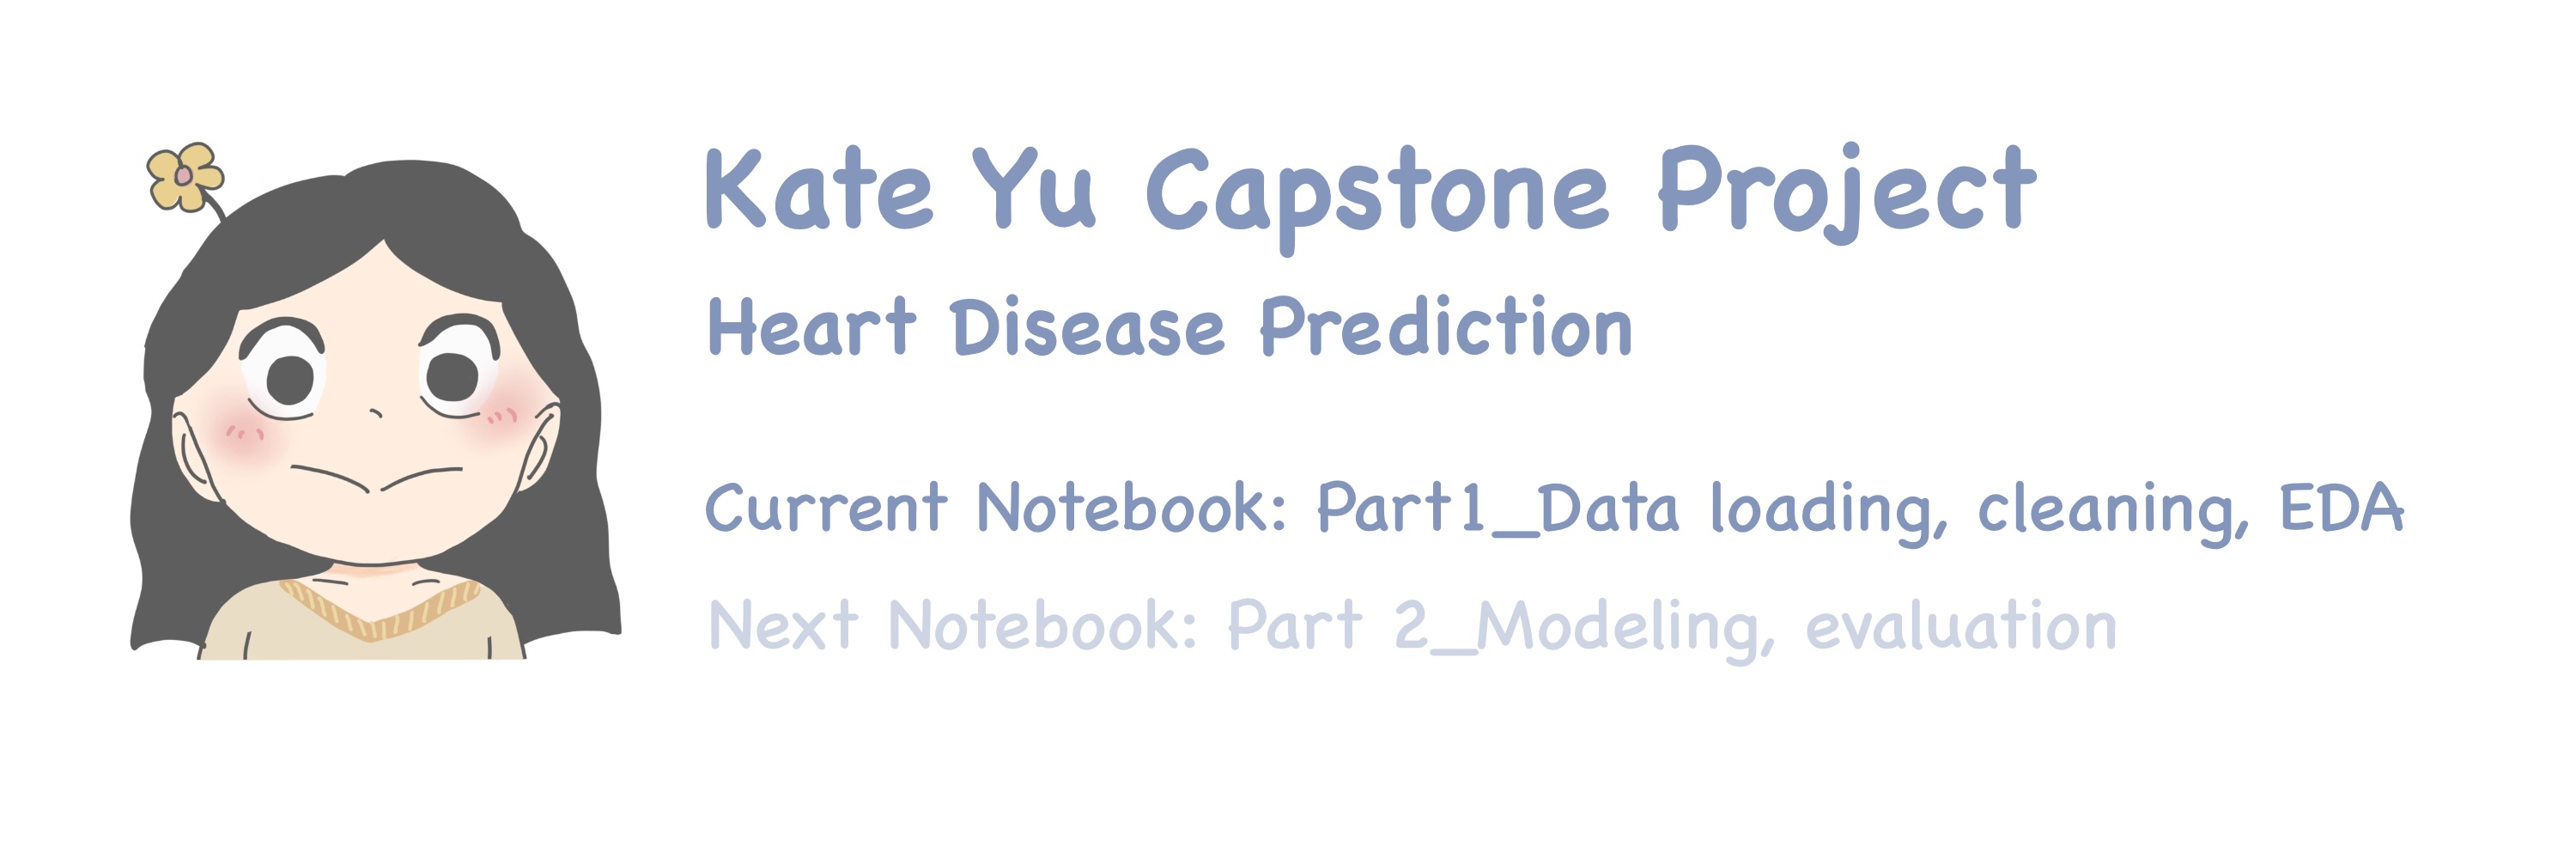

## Table of Content
1. [Introduction](#int)

2. [Load Data & Sanity Check](#lod)

3. [EDA](#eda)

    3.1 [Numeric Columns](#num)  
    3.2 [Categorical Columns](#cat)
    
4. [Export Cleaned Data Into CSV File](#exp)


# Introductions
<a id='int'></a>

## Business Questions and Methodology

🧡 How healthy your heart is? 🧡

Heart disease is the leading cause of death, so in this project, I was focused on build an application that can accurately calculate if a person have high possibility of getting heart disease using machine learning and other analyzing techniques. 

The data of this project was directly from [Kaggle](https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease) (shorten version) and originally collected from 2020 annual CDC survey of 400k adults related to their health status (CDC: Centers for Disease Control and Prevention). 

The data consists of numeric, binary, multi-class variables that showing the status of health, and also if the person have heart disease or not.

The goal of this project is to build a high accuracy machine learning model to predict if the person will get heart disease and also the top indicators of heart disease. 

## Data Dictionary

 All the variables in the dataset have been listed and explained in the following block of text:

**Numeric Independent Data:**
- BMI: body mass index
- PhysicalHealth: days in a month feel physical health is not good
- MentalHealth: days in a month feel mental health is not good
- SleepTime: average sleep time

**Categorical Independent Data:**
- Smoking: if smoked at least 100 cigarettes in entire life
- AlcoholDrinking: if have more than 14 drinks of alcohol (men) or more than 7 (women) in a week
- Stroke: if have ever had a stroke
- DiffWalking: if feel serious difficulty walking or climbing stairs
- Sex: male or female
- AgeCategory: age in five years interval  
- Race: ancestral background
- Diabetic: if have ever had diabetic
- PhysicalActivity: if have physical activity or exercise during the past 30 days other than the regular job
- GenHealth: overall rate of general health
- Asthma: if have asthma
- KidneyDisease: if have kidney disease
- SkinCancer: if have skin cancer

**Field of interest:**
- HeartDisease: if the people have heart disease or not

# Load Data & Sanity Check
<a id='loa'></a>

## Import packages

In [1]:
# the data science trinity
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# seaborn
import seaborn as sns

# import statistic tools
from scipy import stats

# model selection tools
from sklearn.model_selection import train_test_split

# scaler
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# linear models
from sklearn.linear_model import LogisticRegression

# metrics 
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_curve, roc_auc_score, accuracy_score


# no warning message
pd.options.mode.chained_assignment = None

## Load data

In [2]:
# load data
df = pd.read_csv('heart_disease_prediction.csv')
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No


## Check for data shape and size

In [3]:
print(f'The hear_disease_prediction dataset consists of {df.shape[0]} rows and {df.shape[1]} columns.')
print(f'The hear_disease_prediction dataset consists of {df.size} elements.')

The hear_disease_prediction dataset consists of 319795 rows and 18 columns.
The hear_disease_prediction dataset consists of 5756310 elements.


## Check for column names and data type

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  int64  
 6   MentalHealth      319795 non-null  int64  
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  int64  
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

**NOTE:** Based on the previous peek of dataset and above summary, we can briefly conclude that: 
- For independent variables: 
    - 'BMI', 'PysicaHealth', 'MentalHealth', 'SleepTime' are the only 4 numeric variables in the dataset. 
    - 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'Diabetic', 'PhysicalActivity', 'Asthm', 'KidneyDisease', 'SkinCancer' seems like as binary variable
    - 'AgeCategory', 'Race', 'GenHealth' are the rest of categorical variables
- For dependent variables:
    - 'HeartDisease' is a binary categorical variable

## Check NULL values

In [5]:
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

**NOTE:** There is no NULL value in the dataset, will move on to the EDA steps.

# Exploratory Data Analysis 
<a id='eda'></a>

In [6]:
# seperate numeric and categorical columns
numeric_col_list = list(df.select_dtypes("number").columns)
categorical_col_list = list(df.select_dtypes("object").columns)

print(f'Numeric columns are {numeric_col_list}')
print(f'Categorical columns are {categorical_col_list}')

Numeric columns are ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']
Categorical columns are ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']


## Numeric Columns
<a id='num'></a>

### Overall checking 

In [7]:
# start a new clean dataframe
df_clean = df[numeric_col_list].copy()
df_clean.head()

,BMI,PhysicalHealth,MentalHealth,SleepTime
0,16.60,3,30,5
1,20.34,0,0,7
2,26.58,20,30,8
3,24.21,0,0,6
4,23.71,28,0,8


**NOTE:** There are 4 numeric variables, BMI, Physical Health, Mental Health, Sleep time.

### Correlations

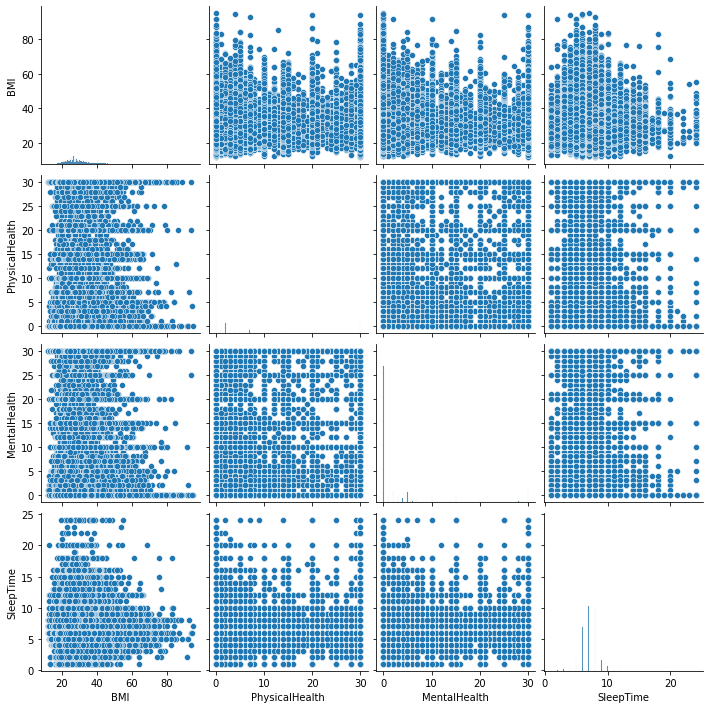

In [8]:
# check correlations between numerical variables
sns.pairplot(df_clean)
plt.show()

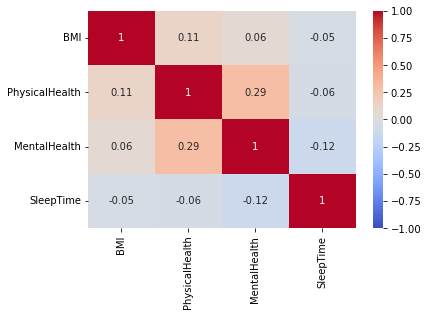

In [9]:
# check correlation in heatmap
sns.heatmap(df_clean.corr().round(2), vmin=-1, vmax=1, cmap="coolwarm", annot=True)
plt.show()

**NOTE:** 
- Based on the scatter plot, it seems that all variables are pretty spread out, no strong linear relationship was found
- Based on the heatmap, it seems there is no obvious strong correlation between these numeric variables as well. 
- Physical health and Mental health have slightly positive correlation between each others. 

### Distributions

In [10]:
# check general distribution
df_clean.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


**Note:** 
- Mean of BMI is 28, which is fallen into overweight category based on [CDC official definition](https://www.cdc.gov/healthyweight/assessing/bmi/adult_bmi/index.html#Why)
- The average sleep time is 7 hours, and average days don not feel good are3-4 days

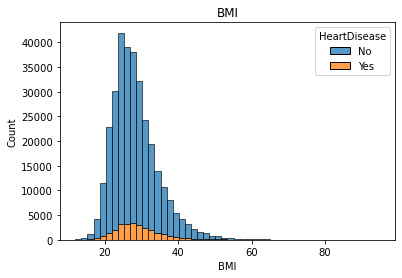

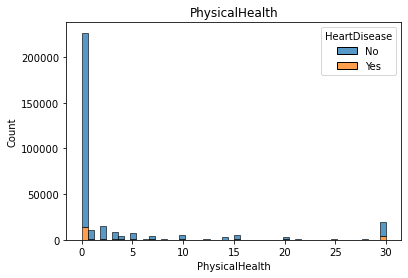

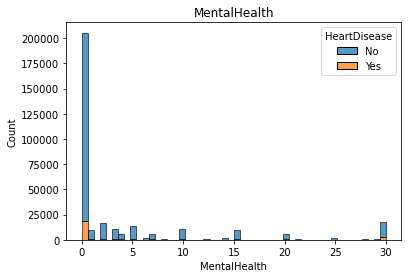

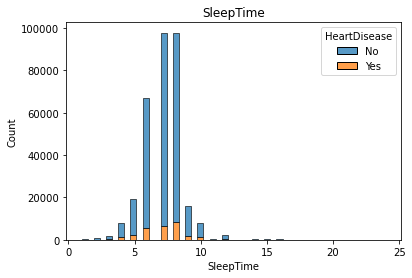

In [11]:
# plot the distributions with heart disease status
for column in df_clean.columns:
    sns.histplot(x=column, data=df_clean, hue=df['HeartDisease'],bins=50, multiple="stack")
    plt.title(column)
    plt.show()

**NOTE:** 
- BMI and sleep time seem more close to normal distribution
- Physical health & mental health status has majority as 0, and little peak at the high end (30)
- In terms of the 'heart disease' percentage in these variables, no obvious trend has found in particular groups of people, the possibilities of getting heart disease with different condition are pretty similar

## Categorical Columns
<a id='cat'></a>

**Define a function to show the distribution and graph of the feature (categorized by 'HeartDisease')**

In [12]:
# define a summary table and plot for independent variables
def plot_heartdisease_ratios(data, column):
    """
    Plots the given column against the heartdisease in the data.
    """
    total_count = data.groupby([column, "HeartDisease"])[column].count()
    pct_contact_type = round(total_count/data.groupby(column)[column].count(),2)

    pct_contact_type = pct_contact_type.unstack()
    
    display(pct_contact_type)
    
    pct_contact_type.plot(kind="barh", stacked=True, figsize=(10,8))
    sns.despine()
    plt.legend(loc='upper right')
    plt.title(f"{column} vs Heart Disease Status", fontsize=35)
    plt.xlabel('Possibility')

    plt.show()

**Define a function to calculate Chi-square result for the feature**

In [13]:
def chi_square(column):
    col = df.groupby([column,'HeartDisease'])[column].count().unstack()
    df_col = pd.DataFrame(col)
    return stats.chi2_contingency(df_col)

### Binary Columns
<a id='bin'></a>

#### 'Smoking'

In [14]:
# check the options for smoking
df['Smoking'].value_counts()

No     187887
Yes    131908
Name: Smoking, dtype: int64

HeartDisease,No,Yes
Smoking,,
No,0.94,0.06
Yes,0.88,0.12


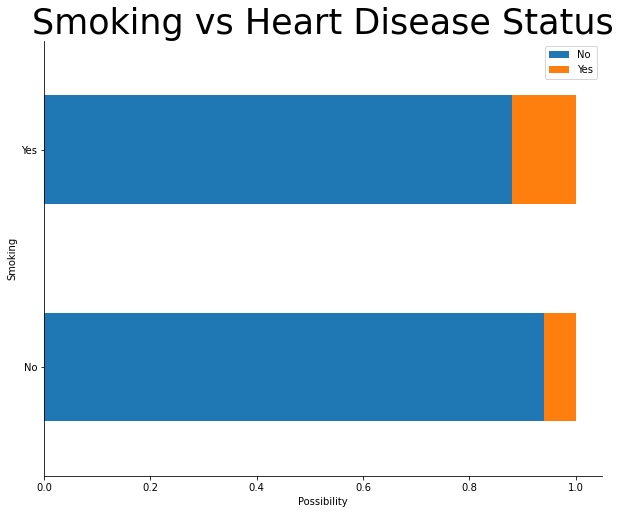

In [15]:
# check the relationship with target variable
plot_heartdisease_ratios(df, 'Smoking')

**NOTE:** 
- The amount of smoking / non-smoking people are similar
- More people get disease from smoking group
- Will run a chi-square to see if those two variables are independent

In [16]:
# check the chi square to see if two groups are significant different
chi_square('Smoking')

(3713.0331469808216,
 0.0,
 1,
 array([[171804.72588377,  16082.27411623],
        [120617.27411623,  11290.72588377]]))

**NOTE:**
- With a p-value of 0.0, we can reject the null hypothesis that smoking and heart disease occurrence are independent. In other words, smoking and heart disease are associate with each other. 
- Smokers seems to positively correlate to heart disease. 

#### 'AlcoholDrinking'

In [17]:
# check the options for Aalcohol drinking
df['AlcoholDrinking'].value_counts()

No     298018
Yes     21777
Name: AlcoholDrinking, dtype: int64

HeartDisease,No,Yes
AlcoholDrinking,,
No,0.91,0.09
Yes,0.95,0.05


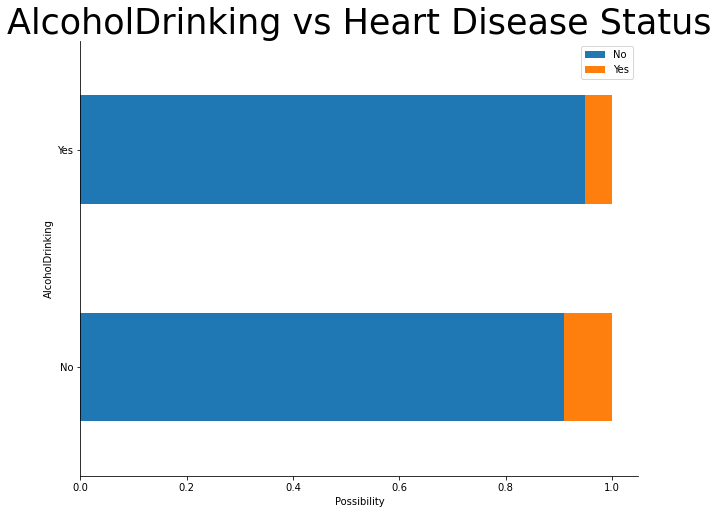

In [18]:
# check the relationship with target variable
plot_heartdisease_ratios(df, 'AlcoholDrinking')

**NOTE:**
- Most of people are not heavy drinkers,and more percentage of non-heavy drinker have more amount of people getting heart disease
- Drinking might not a indicator of heart disease based on this findings

In [19]:
# check the chi square to see if two groups are significant different
chi_square('AlcoholDrinking')

(328.64916890132054,
 1.892352227090306e-73,
 1,
 array([[272509.01232352,  25508.98767648],
        [ 19912.98767648,   1864.01232352]]))

**NOTE:**
- With a p-value of 0.0, we can reject the null hypothesis that drinking alcohol and heart disease occurrence are independent. In other words, alcohol and heart disease are associate with each other. 
- Interestingly, drinking certain amount of alcohol seems to negatively correlate to heart disease. 

#### 'Stroke'

In [20]:
# check the options
df['Stroke'].value_counts()

No     307726
Yes     12069
Name: Stroke, dtype: int64

HeartDisease,No,Yes
Stroke,,
No,0.93,0.07
Yes,0.64,0.36


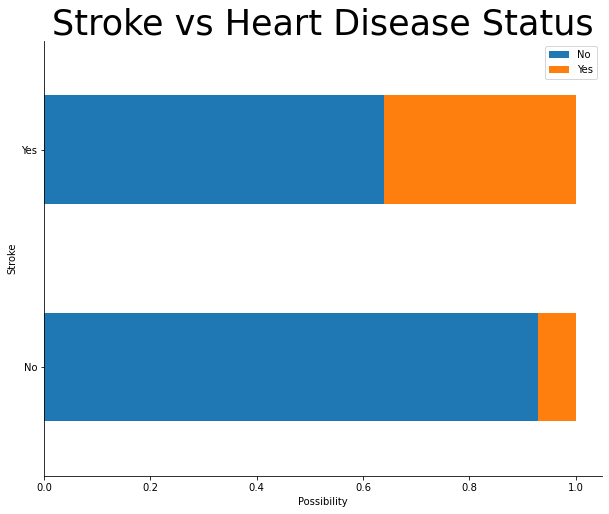

In [21]:
# check the relationship with target variable
plot_heartdisease_ratios(df, 'Stroke')

**NOTE:**
- People who have had stock before, have around 5 times higher possibility getting heart disease

#### 'DiffWalking'

In [22]:
# check the options
df['DiffWalking'].value_counts()

No     275385
Yes     44410
Name: DiffWalking, dtype: int64

HeartDisease,No,Yes
DiffWalking,,
No,0.94,0.06
Yes,0.77,0.23


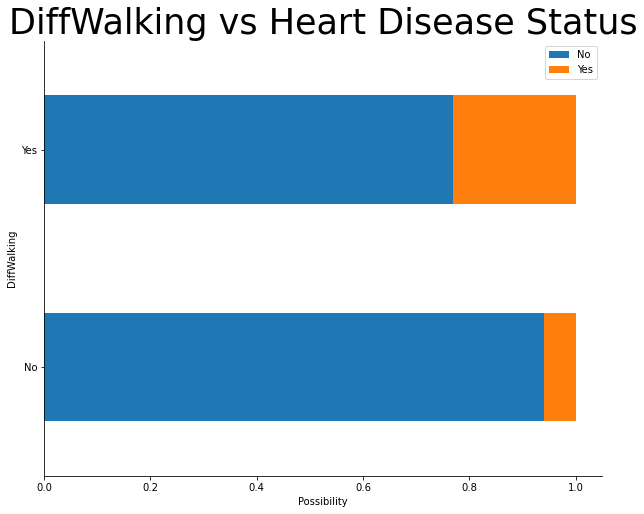

In [23]:
# check the relationship with target variable
plot_heartdisease_ratios(df, 'DiffWalking')

**NOTE:**
- More people don't have difficulty when climbing the stairs
- People who have difficulty have around 4 times higher possibility getting heart disease

#### 'Sex'

In [24]:
# check the options
df['Sex'].value_counts()

Female    167805
Male      151990
Name: Sex, dtype: int64

HeartDisease,No,Yes
Sex,,
Female,0.93,0.07
Male,0.89,0.11


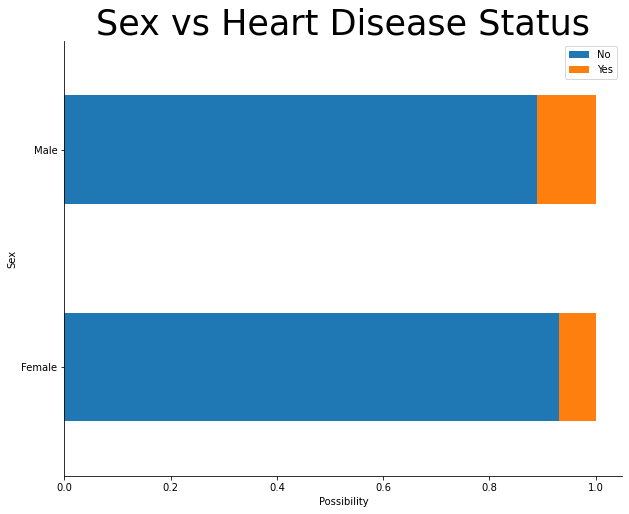

In [25]:
# check the relationship with target variable
plot_heartdisease_ratios(df, 'Sex')

In [26]:
# convert 'Sex' column to numeric 1/0
df_clean['Sex'] = np.where(df['Sex'] == "Female", 1, 0)
# remove from categorical column list
categorical_col_list.remove('Sex')

**NOTE:**
- The dataset has balanced gender distributed
- Men seems have higher rate of getting heart disease compared to women
- Will run a chi-square to see if those two variables are independent

In [27]:
# check the chi square to see if two groups are significant different
chi_square('Sex')

(1568.3069168517372,
 0.0,
 1,
 array([[153441.65390328,  14363.34609672],
        [138980.34609672,  13009.65390328]]))

**NOTE:**
- With a p-value of 0.0, we can reject the null hypothesis that sex and heart disease occurrence are independent. In other words, sex and heart disease are associate with each other. 
- Male seems to positively correlate to heart disease. 

#### 'PhysicalActivity'

In [28]:
# check the options
df['PhysicalActivity'].value_counts()

Yes    247957
No      71838
Name: PhysicalActivity, dtype: int64

HeartDisease,No,Yes
PhysicalActivity,,
No,0.86,0.14
Yes,0.93,0.07


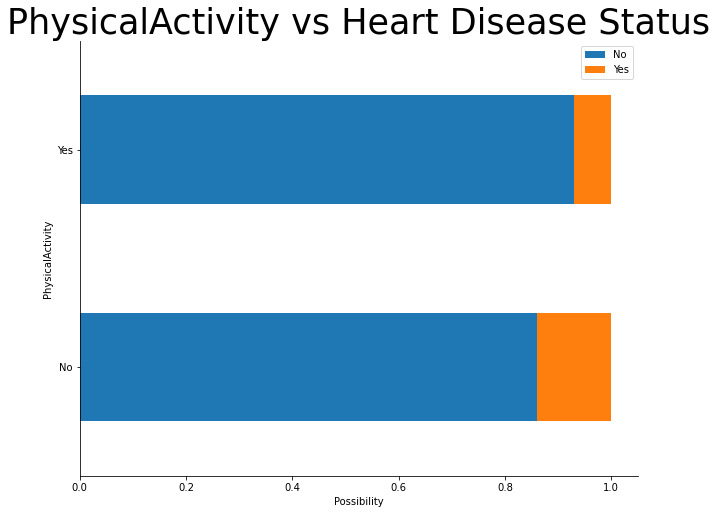

In [29]:
# check the relationship with target variable
plot_heartdisease_ratios(df, 'PhysicalActivity')

**NOTE:**
- Most people tend to have certain extra physical activity other than work
- People who do not do exericise have high proportion getting hear disease
- Lack of physical activity might be positively correlate to heart disease based on this finding

#### 'Asthma'

In [30]:
# check the options
df['Asthma'].value_counts()

No     276923
Yes     42872
Name: Asthma, dtype: int64

HeartDisease,No,Yes
Asthma,,
No,0.92,0.08
Yes,0.88,0.12


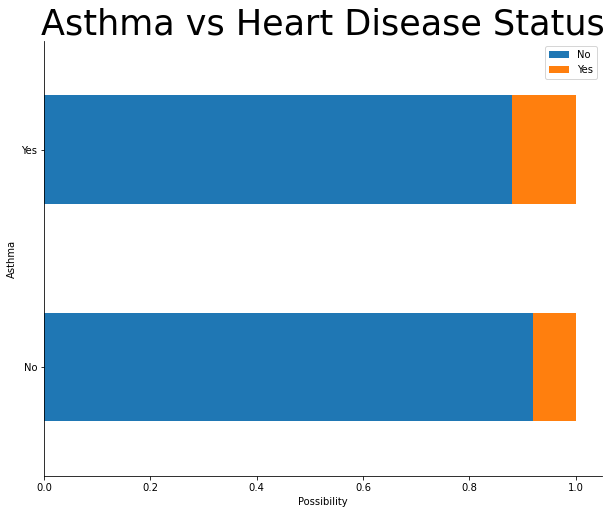

In [31]:
# check the relationship with target variable
plot_heartdisease_ratios(df, 'Asthma')

**NOTE:**
- People who have asthma tend to have slightly more possibility having heart disease as well
- Will run a chi-square to see if those two variables are independent

In [32]:
# check the chi square to see if two groups are significant different
chi_square('Asthma')

(548.8508413264418,
 2.2386144306283177e-121,
 1,
 array([[253219.6485436,  23703.3514564],
        [ 39202.3514564,   3669.6485436]]))

**NOTE:**
- With a p-value close to 0, we can reject the null hypothesis that asthma and heart disease occurrence are independent. In other words, asthma and heart disease are associate with each other. 
- Asthma seems to positively correlate to heart disease. 

#### 'KidneyDisease'

In [33]:
# check the options
df['KidneyDisease'].value_counts()

No     308016
Yes     11779
Name: KidneyDisease, dtype: int64

HeartDisease,No,Yes
KidneyDisease,,
No,0.92,0.08
Yes,0.71,0.29


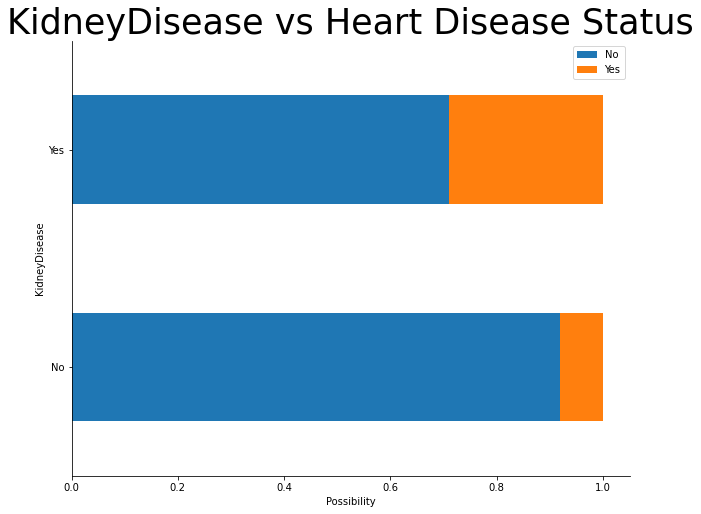

In [34]:
# check the relationship with target variable
plot_heartdisease_ratios(df, 'KidneyDisease')

**NOTE:**
- People who have kidney disease tend to have 3 times possibility having heart disease

#### 'SkinCancer'

In [35]:
# check the options
df['SkinCancer'].value_counts()

No     289976
Yes     29819
Name: SkinCancer, dtype: int64

HeartDisease,No,Yes
SkinCancer,,
No,0.92,0.08
Yes,0.83,0.17


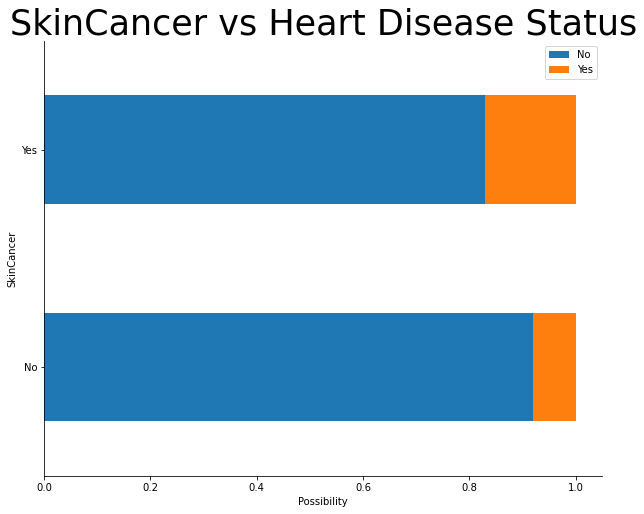

In [36]:
# check the relationship with target variable
plot_heartdisease_ratios(df, 'SkinCancer')

**NOTE:**
- People who have skin cancer tend to have 2 times possibility having heart disease

#### Convert Binary Columns

In [37]:
binary_list = ['Smoking','AlcoholDrinking','Stroke','DiffWalking','PhysicalActivity','Asthma','KidneyDisease','SkinCancer','HeartDisease']

for binary_column in binary_list:
    # convert to numeric and add to numeric list 
    df_clean[binary_column] = np.where(df[binary_column] == "Yes", 1, 0)

    # remove from categorical column list
    categorical_col_list.remove(binary_column)

In [38]:
# sanity check
df_clean.head()

,BMI,PhysicalHealth,MentalHealth,SleepTime,Sex,Smoking,AlcoholDrinking,Stroke,DiffWalking,PhysicalActivity,Asthma,KidneyDisease,SkinCancer,HeartDisease
0,16.60,3,30,5,1,1,0,0,0,1,1,0,1,0
1,20.34,0,0,7,1,0,0,1,0,1,0,0,0,0
2,26.58,20,30,8,0,1,0,0,0,1,1,0,0,0
3,24.21,0,0,6,1,0,0,0,0,0,0,0,1,0
4,23.71,28,0,8,1,0,0,0,1,1,0,0,0,0


In [39]:
# sanity check
categorical_col_list

['AgeCategory', 'Race', 'Diabetic', 'GenHealth']

### Multi-class Category Columns
<a id='mul'></a>

#### 'AgeCategory'

In [40]:
# check the age distributions 
age_cat = pd.DataFrame(df['AgeCategory'].value_counts())
age_cat = age_cat.reset_index()
age_cat = age_cat.sort_values(by=['index'])
age_cat.rename(columns = {'index':'age_groups','AgeCategory':'total_count'}, inplace=True)
age_cat['percentage'] = round(age_cat['total_count']/age_cat['total_count'].sum(),2)
age_cat.reset_index(drop=True, inplace=True)
age_cat

,age_groups,total_count,percentage
0,18-24,21064,0.07
1,25-29,16955,0.05
2,30-34,18753,0.06
3,35-39,20550,0.06
4,40-44,21006,0.07
5,45-49,21791,0.07
6,50-54,25382,0.08
7,55-59,29757,0.09
8,60-64,33686,0.11
9,65-69,34151,0.11


Text(0.5, 1.0, 'Number of People with/without Heart Disease in Different Age Group')

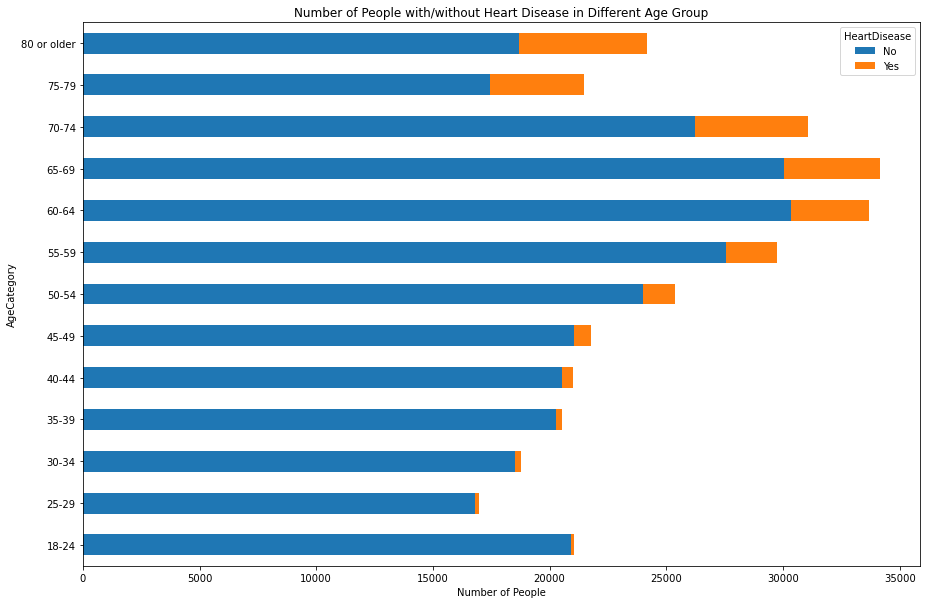

In [41]:
df.groupby(['AgeCategory','HeartDisease'])['HeartDisease'].count().unstack().plot(kind='barh', stacked=True, figsize=(15,10))

plt.xlabel('Number of People')
plt.title('Number of People with/without Heart Disease in Different Age Group')

**NOTE**:
- Most people in the dataset have age beyond 50
- Overall people who have heart disease are older than people who do not
- The average age in patients who have heart disease is 70, which is higher than people who do not have heart disease
- People who are older than 80, has highest possibility getting heart disease
- Since the age categories are in order, so it will be easier to analyze as a numeric variable and prevent multicollinearity as categorical columns, will be changed in next steps

**Convert 'AgeCategory' to continious variable**

In [42]:
# copy to clean dataset
df_clean['Age']= df['AgeCategory']

In [43]:
# check value counts for each class
df_clean['Age'].value_counts()

65-69          34151
60-64          33686
70-74          31065
55-59          29757
50-54          25382
80 or older    24153
45-49          21791
75-79          21482
18-24          21064
40-44          21006
35-39          20550
30-34          18753
25-29          16955
Name: Age, dtype: int64

In [44]:
# convert each class range to the same number (minimum age in the range)
df_clean.loc[df_clean['Age']=='18-24','Age']=18
df_clean.loc[df_clean['Age']=='25-29','Age']=25
df_clean.loc[df_clean['Age']=='30-34','Age']=30
df_clean.loc[df_clean['Age']=='35-39','Age']=35
df_clean.loc[df_clean['Age']=='40-44','Age']=40
df_clean.loc[df_clean['Age']=='45-49','Age']=45
df_clean.loc[df_clean['Age']=='50-54','Age']=50
df_clean.loc[df_clean['Age']=='55-59','Age']=55
df_clean.loc[df_clean['Age']=='60-64','Age']=60
df_clean.loc[df_clean['Age']=='65-69','Age']=65
df_clean.loc[df_clean['Age']=='70-74','Age']=70
df_clean.loc[df_clean['Age']=='75-79','Age']=75
df_clean.loc[df_clean['Age']=='80 or older','Age']=80

In [45]:
# convert into int datatype
df_clean['Age'] = df_clean['Age'].astype('int64')

In [46]:
# sanity check
df_clean['Age'].value_counts()

65    34151
60    33686
70    31065
55    29757
50    25382
80    24153
45    21791
75    21482
18    21064
40    21006
35    20550
30    18753
25    16955
Name: Age, dtype: int64

In [47]:
# remove 'AgeCategory' from categorical list
categorical_col_list.remove('AgeCategory')

In [48]:
# sanity check
categorical_col_list

['Race', 'Diabetic', 'GenHealth']

Text(0.5, 1.0, 'Age VS Heart Disease Status')

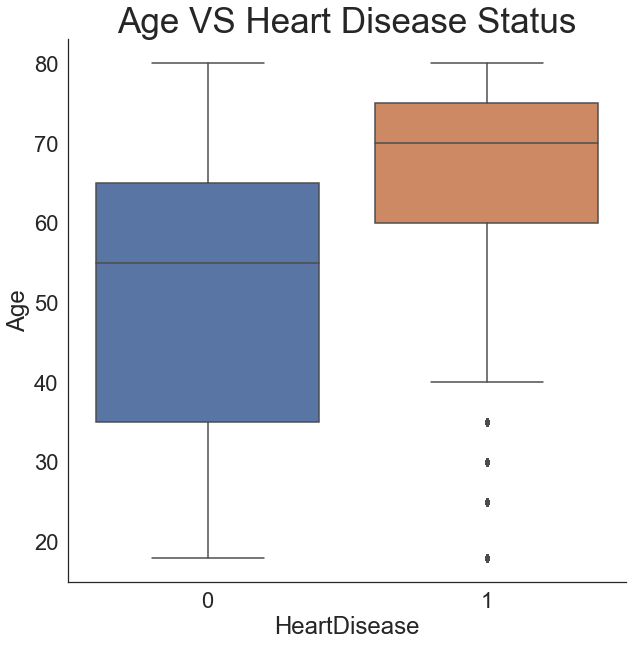

In [49]:
# create a boxplot for age category 
plt.figure(figsize=(10,10))
sns.set(font_scale = 2)
sns.set_style('white')
sns.boxplot(x='HeartDisease',y='Age', data=df_clean)
sns.despine()
plt.title('Age VS Heart Disease Status', fontsize=35)

In [50]:
# check the mean age for people who have heart disease and not
df_clean.groupby(['HeartDisease'])['Age'].mean()

HeartDisease
0    51.156537
1    66.162094
Name: Age, dtype: float64

#### 'Race'

In [51]:
# check the options
df['Race'].value_counts()

White                             245212
Hispanic                           27446
Black                              22939
Other                              10928
Asian                               8068
American Indian/Alaskan Native      5202
Name: Race, dtype: int64

HeartDisease,No,Yes
Race,,
American Indian/Alaskan Native,0.90,0.10
Asian,0.97,0.03
Black,0.92,0.08
Hispanic,0.95,0.05
Other,0.92,0.08
White,0.91,0.09


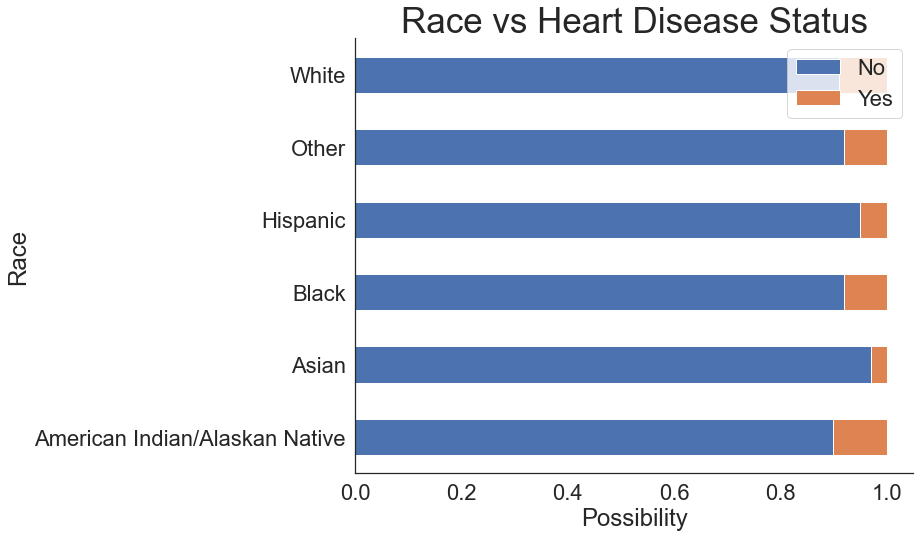

In [52]:
# check the relationship with target variable
plot_heartdisease_ratios(df, 'Race')

**NOTE:**
- The dataset has imbalanced races distributed, white people are th majority
- Asian and Hispanic people have lowest proportion of heart disease cases

In [53]:
# check the chi square to see if two groups are significant different
chi_square('Race')

(844.3148859632537,
 2.9886131565632597e-180,
 5,
 array([[  4756.73241921,    445.26758079],
        [  7377.41583202,    690.58416798],
        [ 20975.52575244,   1963.47424756],
        [ 25096.74701606,   2349.25298394],
        [  9992.61281759,    935.38718241],
        [224222.9661627 ,  20989.0338373 ]]))

**NOTE:**
- With a p-value of very close to 0, we can reject the null hypothesis that race and heart disease occurance are independent. In other words, race and heart disease are associate with each other. 
- Asia people seems to less positively correlate to heart disease. 

#### 'Diabetic'

In [54]:
# check the options
df['Diabetic'].value_counts()

No                         269653
Yes                         40802
No, borderline diabetes      6781
Yes (during pregnancy)       2559
Name: Diabetic, dtype: int64

HeartDisease,No,Yes
Diabetic,,
No,0.94,0.06
"No, borderline diabetes",0.88,0.12
Yes,0.78,0.22
Yes (during pregnancy),0.96,0.04


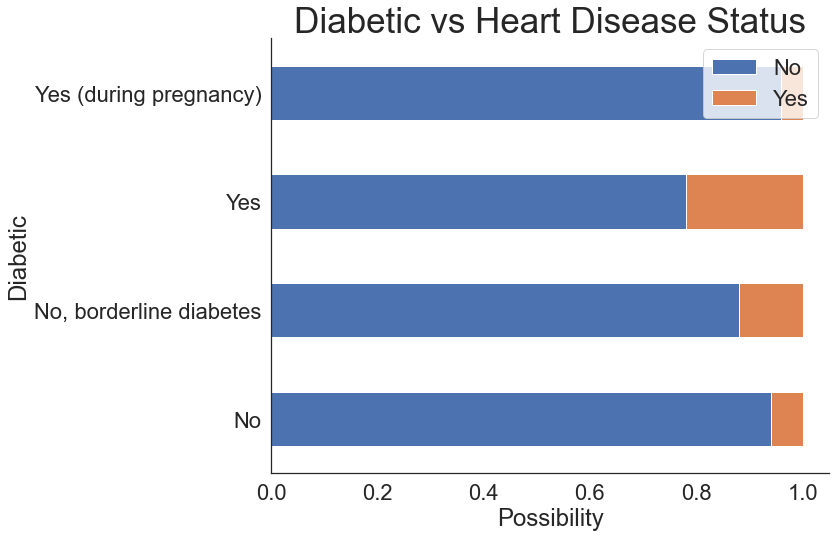

In [55]:
# check the relationship with target variable
plot_heartdisease_ratios(df, 'Diabetic')

**NOTE:**
- Most people don't have diabetic disease history
- People who have diabetic tend to have more possibility getting heart disease


In [56]:
# check the options
df['Diabetic'].value_counts(normalize=True)

No                         0.843206
Yes                        0.127588
No, borderline diabetes    0.021204
Yes (during pregnancy)     0.008002
Name: Diabetic, dtype: float64

**NOTE:**
- Since 'No, borderline diabetes' and 'Yes, during pregnancy' is pretty small percentage, I will assign these two category into 'Yes' and 'No'
- 'No, borderline diabetes' will be categorized into 'Yes' since the possibilities of getting heart disease are close, and 'Yes (during pregnancy)' will be categorized into 'No' because it is more a temperate disease

In [57]:
# assign new values (1/0) to Diabetic column
df_clean['Diabetic'] = df['Diabetic']
df_clean.loc[df_clean['Diabetic']=='No','Diabetic']= 0
df_clean.loc[df_clean['Diabetic']=='Yes','Diabetic']= 1
df_clean.loc[df_clean['Diabetic']=='No, borderline diabetes','Diabetic']= 1
df_clean.loc[df_clean['Diabetic']=='Yes (during pregnancy)','Diabetic']= 0

In [58]:
# convert to int datatype
df_clean['Diabetic'] = df_clean['Diabetic'].astype('int64')

In [59]:
# sanity check
df_clean['Diabetic'].value_counts()

0    272212
1     47583
Name: Diabetic, dtype: int64

In [60]:
# remove from categorical list
categorical_col_list.remove('Diabetic')
categorical_col_list

['Race', 'GenHealth']

#### 'GenHealth'

In [61]:
# check the options
df['GenHealth'].value_counts()

Very good    113858
Good          93129
Excellent     66842
Fair          34677
Poor          11289
Name: GenHealth, dtype: int64

Text(0.5, 1.0, 'General Health VS Heart Disease')

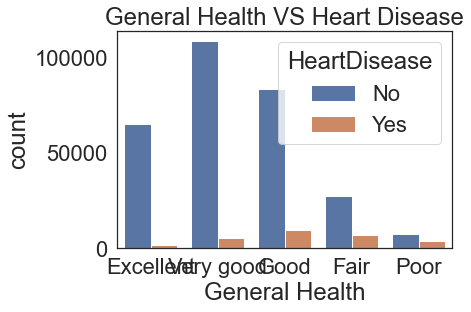

In [62]:
# plot
orders = ['Excellent','Very good','Good','Fair','Poor']

sns.countplot(data=df, x='GenHealth', order = orders, hue='HeartDisease')

plt.xlabel('General Health')
plt.title('General Health VS Heart Disease')

**NOTE:**
- Most people think they are in very good health condition
- People think they are in not too good condition have more health disease possibility
- Since the classes are related and from good to bad in logic, in order to prevent multicollinearity, will be encoded from 0-5

In [63]:
# copy to clean dataset
df_clean['GenHealth']= df['GenHealth']

In [64]:
# convert each class into a series numnbers
df_clean.loc[df_clean['GenHealth']=='Excellent','GenHealth']=4
df_clean.loc[df_clean['GenHealth']=='Very good','GenHealth']=3
df_clean.loc[df_clean['GenHealth']=='Good','GenHealth']=2
df_clean.loc[df_clean['GenHealth']=='Fair','GenHealth']=1
df_clean.loc[df_clean['GenHealth']=='Poor','GenHealth']=0

In [65]:
# convert to int datatype
df_clean['GenHealth'] = df_clean['GenHealth'].astype('int64')

In [66]:
# sanity check
df_clean['GenHealth'].value_counts()

3    113858
2     93129
4     66842
1     34677
0     11289
Name: GenHealth, dtype: int64

In [67]:
# remove from categorical list
categorical_col_list.remove('GenHealth')
categorical_col_list

['Race']

### Check Overall Correlations

**Check relationship with Heart Disease**

In [74]:
# # list all the correlation between independent variable and heart disease, sort the correlations in orders
correlation = df_clean.corr()
corr_heart = correlation['HeartDisease'].sort_values()[:-1]

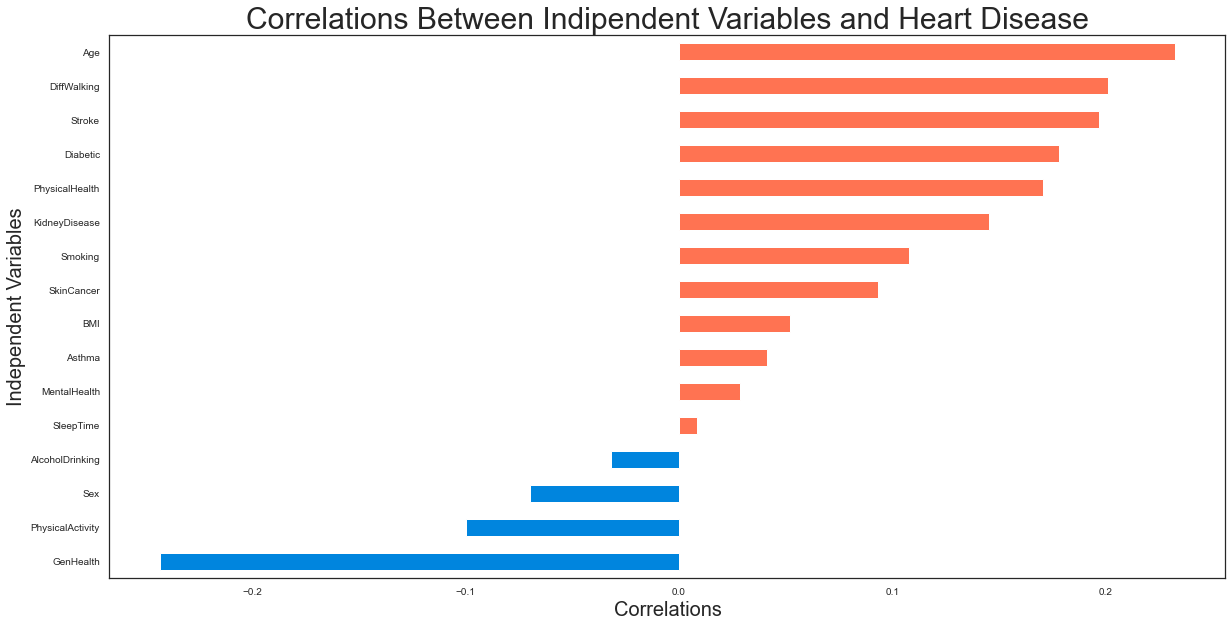

In [75]:
# list all correlations with heart disease and plot
correlation = df_clean.corr()

# set up a color pallete based on positive or negative correlation
color=[]
for i in range(16):
    if corr_heart[i] > 0:
        color.append('#ff7352ff')
    else:
        color.append('#0085deff')

# plot into a graph
corr_heart.plot(kind='barh',figsize=(20, 10), color = color,fontsize=10)
plt.title('Correlations Between Indipendent Variables and Heart Disease',fontsize=30)
plt.xlabel('Correlations',fontsize=20)
plt.ylabel('Independent Variables',fontsize=20)

plt.show()

**Note:**
- Each variable in blue has positive correlation with heart disease, Age, difficulty of walking, stroke are the top 3 high correlated variable
- Drinking certain amount of alcohol, being female, doing physical activity are helping decrease the possibility of getting heart disease

<AxesSubplot:>

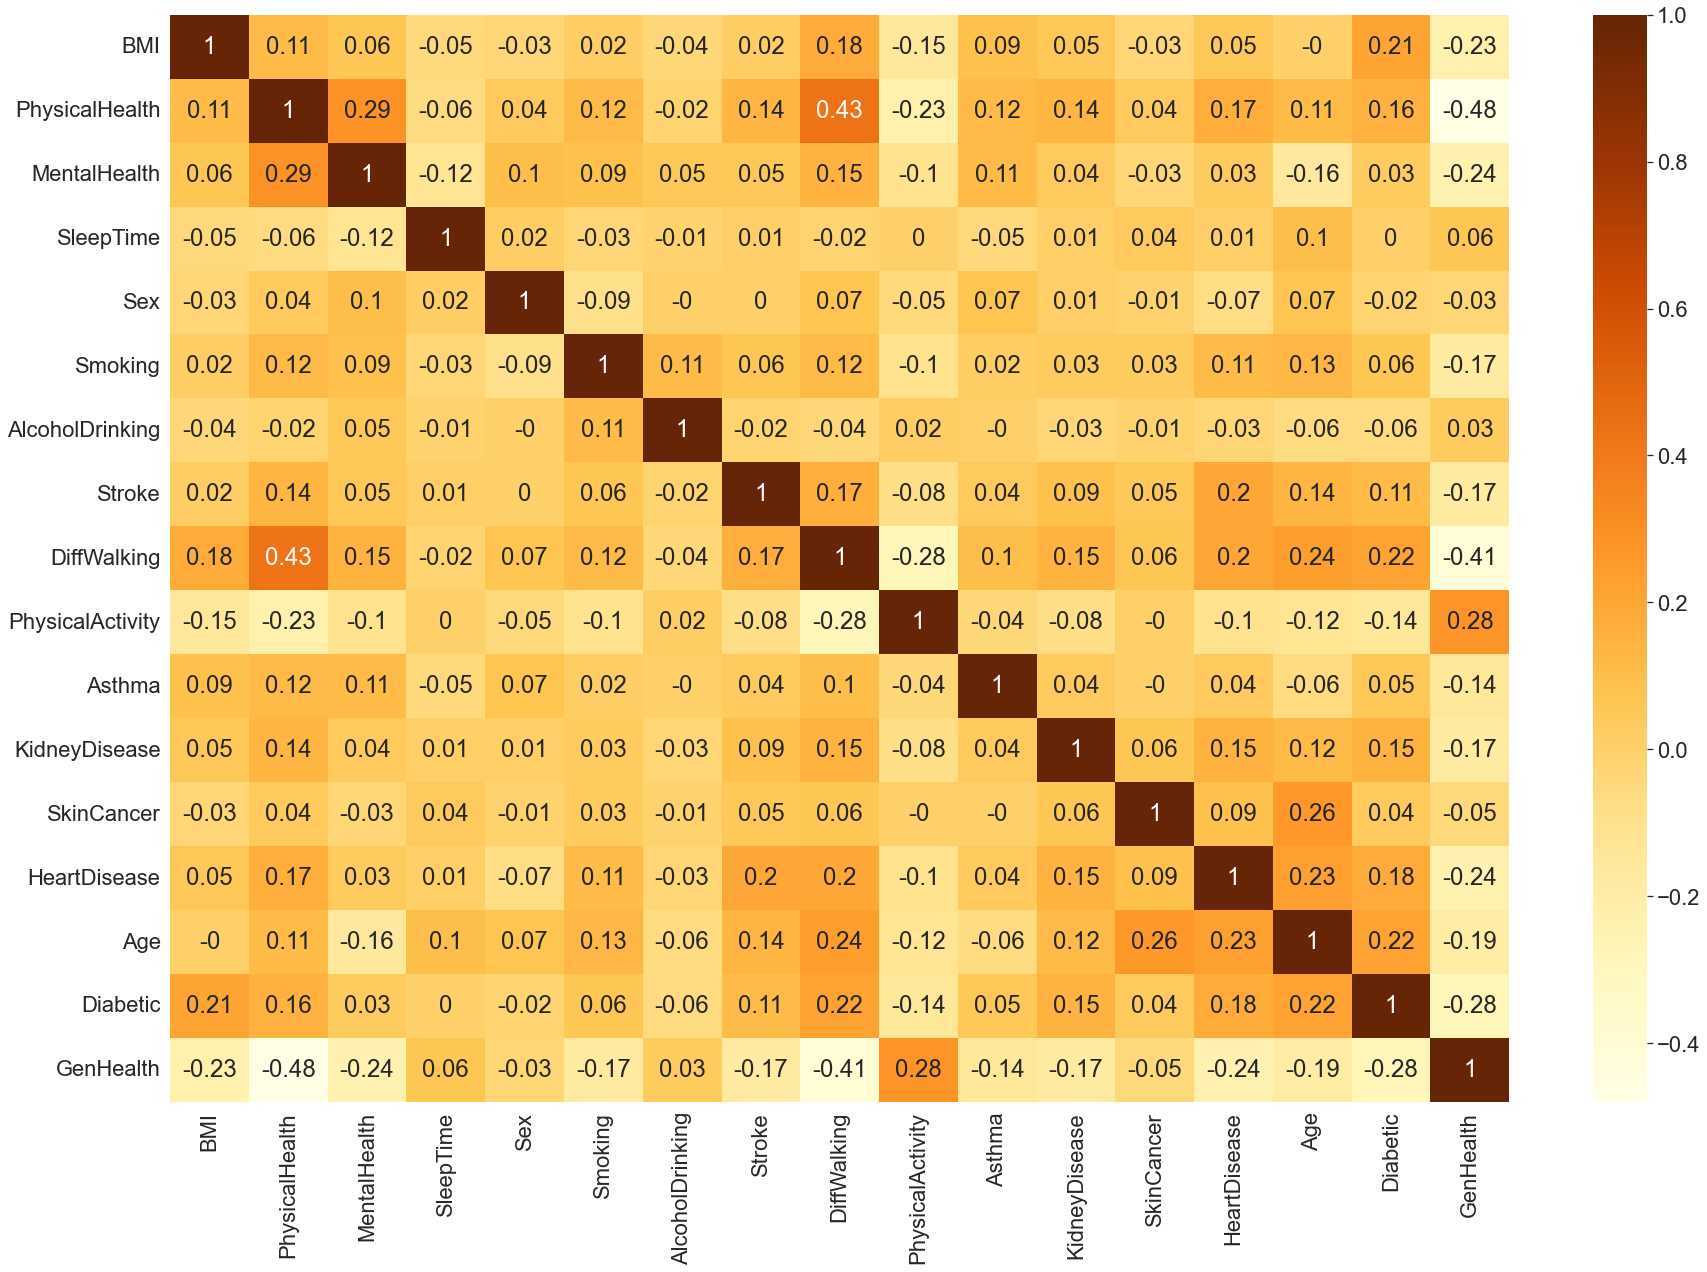

In [83]:
# correlation heatmap
correlation = df_clean.corr().round(2)
plt.figure(figsize = (30,20))
sns.heatmap(correlation, annot = True,cmap = 'YlOrBr')

**Note:**
- No strong correlation between each variables except 'Difficulty walking' and 'Physical health condition'
- It make sense that people who has serious difficulty climbing stairs and walking have more days feeling not good each month

# Export Cleaned Data into csv File
<a id='exp'></a>

In [77]:
# copy the last categorical column into the clean dataset, will continue in next notebook
df_clean['Race'] = df['Race'].copy()

In [78]:
# export the cleaned file to a csv file
df_clean.to_csv('cleaned_dataset.csv', index=False)

In [79]:
# final sanity check
df_clean

,BMI,PhysicalHealth,MentalHealth,SleepTime,Sex,Smoking,AlcoholDrinking,Stroke,DiffWalking,PhysicalActivity,Asthma,KidneyDisease,SkinCancer,HeartDisease,Age,Diabetic,GenHealth,Race
0,16.60,3,30,5,1,1,0,0,0,1,1,0,1,0,55,1,3,White
1,20.34,0,0,7,1,0,0,1,0,1,0,0,0,0,80,0,3,White
2,26.58,20,30,8,0,1,0,0,0,1,1,0,0,0,65,1,1,White
3,24.21,0,0,6,1,0,0,0,0,0,0,0,1,0,75,0,2,White
4,23.71,28,0,8,1,0,0,0,1,1,0,0,0,0,40,0,3,White
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,27.41,7,0,6,0,1,0,0,1,0,1,0,0,1,60,1,1,Hispanic
319791,29.84,0,0,5,0,1,0,0,0,1,1,0,0,0,35,0,3,Hispanic
319792,24.24,0,0,6,1,0,0,0,0,1,0,0,0,0,45,0,2,Hispanic
319793,32.81,0,0,12,1,0,0,0,0,0,0,0,0,0,25,0,2,Hispanic


In [80]:
# data type check
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   BMI               319795 non-null  float64
 1   PhysicalHealth    319795 non-null  int64  
 2   MentalHealth      319795 non-null  int64  
 3   SleepTime         319795 non-null  int64  
 4   Sex               319795 non-null  int32  
 5   Smoking           319795 non-null  int32  
 6   AlcoholDrinking   319795 non-null  int32  
 7   Stroke            319795 non-null  int32  
 8   DiffWalking       319795 non-null  int32  
 9   PhysicalActivity  319795 non-null  int32  
 10  Asthma            319795 non-null  int32  
 11  KidneyDisease     319795 non-null  int32  
 12  SkinCancer        319795 non-null  int32  
 13  HeartDisease      319795 non-null  int32  
 14  Age               319795 non-null  int64  
 15  Diabetic          319795 non-null  int64  
 16  GenHealth         31